## Imports

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image

import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Directory, Image-Name & Image-Size Definitions

In [16]:
model_dir = '/home/drevital/cs_video_processor/models/7_channels'
im_dir = '/home/drevital/cs_video_processor/debug_images/7_channels/classified_not_decided'
im_name = '1_594_.19_2021-11-23--16-59-02_.jpg'
im_height = 200
im_width = 600

## Load Trained Model

In [17]:
model = tf.keras.models.load_model(model_dir)

## Read Images

In [18]:
im_rgb = cv2.imread(os.path.join(im_dir, im_name))
im = cv2.cvtColor(im_rgb, cv2.COLOR_BGR2RGB)  

## Display Images

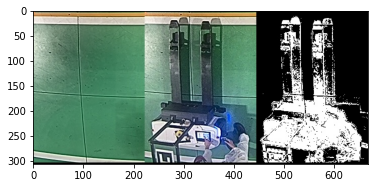

In [19]:
plt.imshow(im)
plt.show() 

## Prepare Images for Prediction

In [20]:
imrgb = cv2.resize(im,
                   dsize=(im_width, im_height),
                   interpolation=cv2.INTER_LINEAR)
imarr = np.array(imrgb, dtype='float32')
w = imarr.shape[1]

im1 = imarr[:, :w//3]
im2 = imarr[:, w//3:(w*2)//3] 
im3 = imarr[:, (w*2)//3:] 
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

# Translate original rabge (0-255) to trained range (0.0-1.0)
im1 /= 255.0
im2 /= 255.0
im3 /= 255.0

# Reshape to match model's input shape
im1 = im1.reshape(1, im1.shape[0], im1.shape[1], 3)
im2 = im2.reshape(1, im2.shape[0], im2.shape[1], 3)
im3 = im3.reshape(1, im3.shape[0], im3.shape[1], 1)

## Predict 

In [21]:
prediction = model.predict([im1, im2, im3])

In [22]:
prediction

array([[0.97533]], dtype=float32)